# Travel Review Rating

## Usecase & Description

-- Details would be added here

## 1. Data Readiness

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from ucimlrepo import fetch_ucirepo 
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [2]:

# fetch dataset 
travel_review_ratings = fetch_ucirepo(id=485) 
  
# data (as pandas dataframes) 
X = travel_review_ratings.data.features 
y = travel_review_ratings.data.targets 
  
# variable information 
display(travel_review_ratings.variables) 


,name,role,type,demographic,description,units,missing_values
0,userid,ID,Categorical,None,None,None,no
1,churches,Feature,Continuous,None,None,None,no
2,resorts,Feature,Continuous,None,None,None,no
3,beaches,Feature,Integer,None,None,None,no
4,parks,Feature,Continuous,None,None,None,no
5,theatres,Feature,Continuous,None,None,None,no
6,museums,Feature,Continuous,None,None,None,no
7,malls,Feature,Continuous,None,None,None,no
8,zoos,Feature,Continuous,None,None,None,no
9,restaurants,Feature,Integer,None,None,None,no


In [3]:
## Convert the UCI ML Repo dataset to a pandas DataFrame
df_travel_review_ratings = travel_review_ratings.data.original
display(df_travel_review_ratings)

,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [5]:
df_user_demographics = pd.read_csv('fake_users.csv', sep=',')
display(df_user_demographics)

,userid,age,gender,country
0,User 1,25,Other,IN
1,User 2,41,Female,US
2,User 3,59,Female,UK
3,User 4,72,Female,UK
4,User 5,74,Male,UK
...,...,...,...,...
5995,User 5996,78,Female,US
5996,User 5997,62,Female,UK
5997,User 5998,25,Male,US
5998,User 5999,74,Other,US


In [7]:
df_user_travel_reviews = pd.merge(df_user_demographics, df_travel_review_ratings, on='userid', how='inner')
display(df_user_travel_reviews)

,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,25,Other,IN,0.00,0.00,3.63,3.65,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,41,Female,US,0.00,0.00,3.63,3.65,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,59,Female,UK,0.00,0.00,3.63,3.63,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,72,Female,UK,0.00,0.50,3.63,3.63,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,74,Male,UK,0.00,0.00,3.63,3.63,5.00,2.92,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,68,Other,US,0.91,5.00,4.00,2.79,2.77,2.57,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,56,Other,US,0.93,5.00,4.02,2.79,2.78,2.57,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,48,Female,US,0.94,5.00,4.03,2.80,2.78,2.57,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,72,Male,US,0.95,4.05,4.05,2.81,2.79,2.44,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [8]:
## Perform Descriptive Statistics on the DataFrame
## We can see 
display(df_user_travel_reviews.describe(include='all'))

,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456,5456.000000,5456,5456,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
unique,5456,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 1,NaN,Other,US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1885,1862,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,48.732588,NaN,NaN,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,NaN,18.013198,NaN,NaN,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,33.000000,NaN,NaN,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,NaN,49.000000,NaN,NaN,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,NaN,64.000000,NaN,NaN,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000


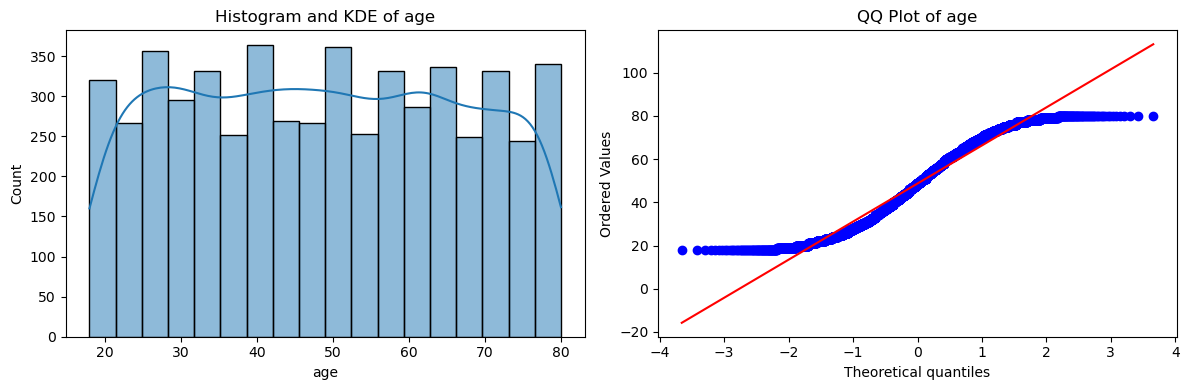

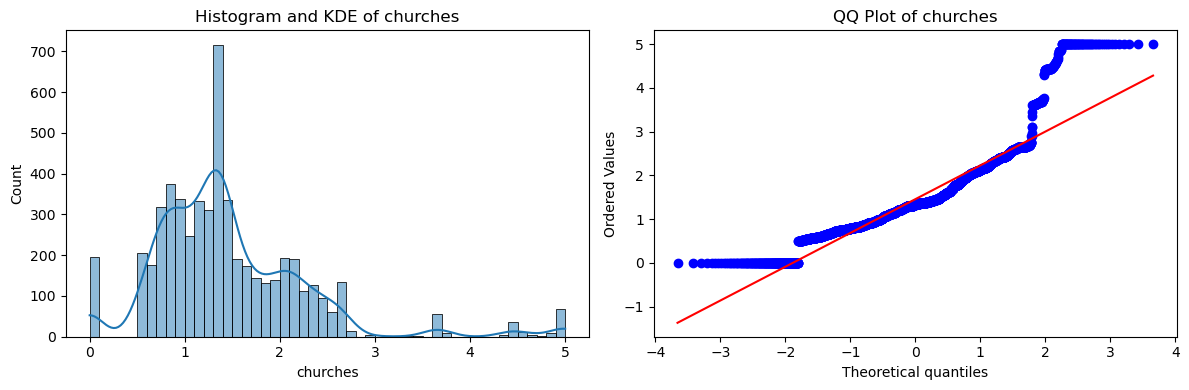

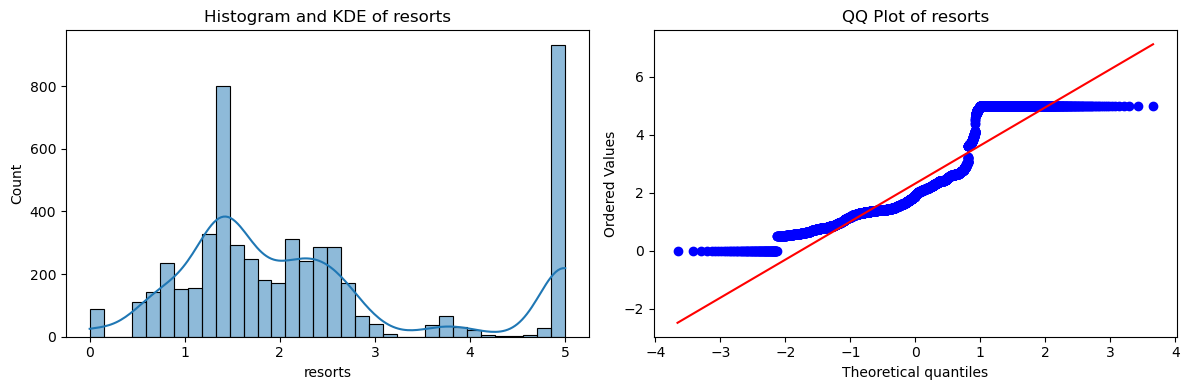

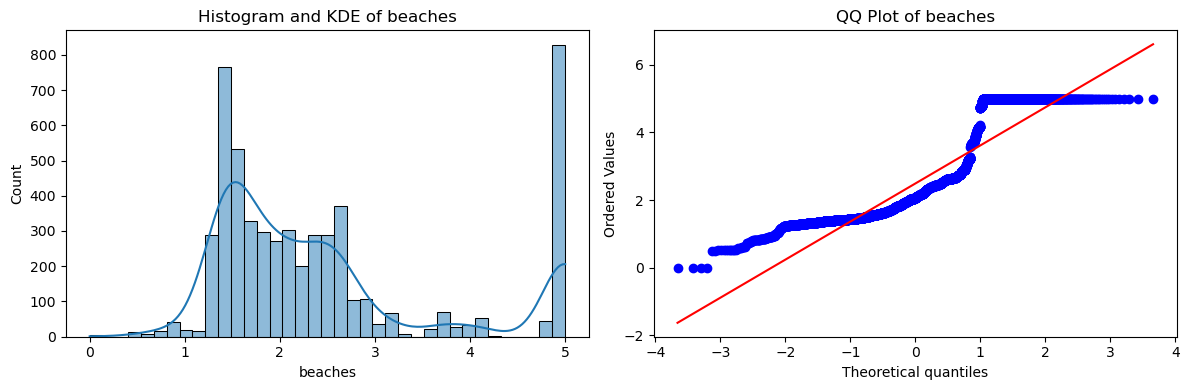

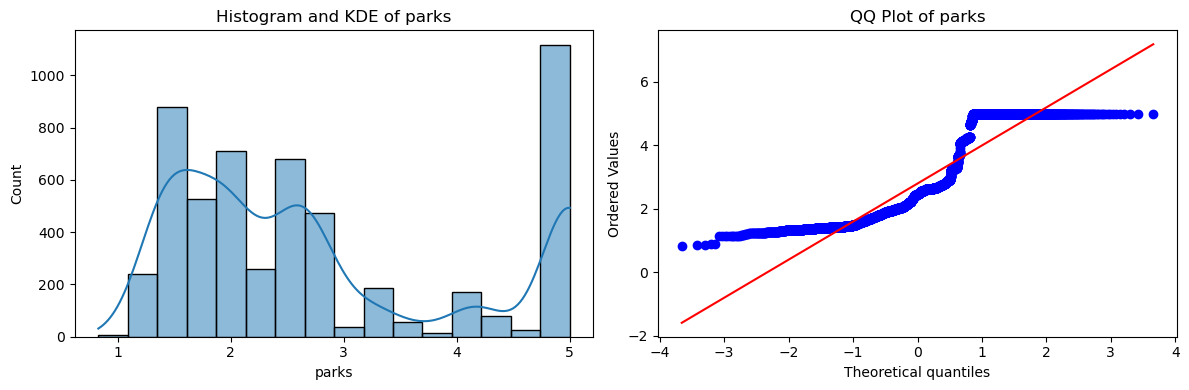

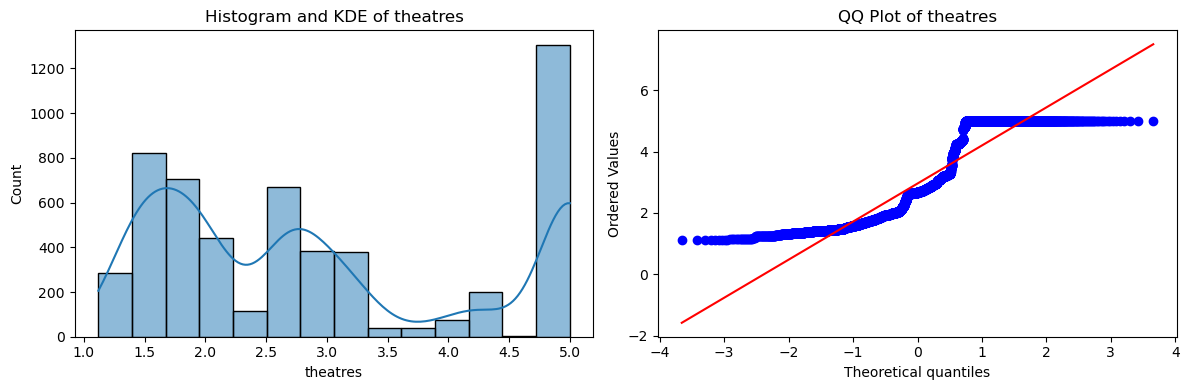

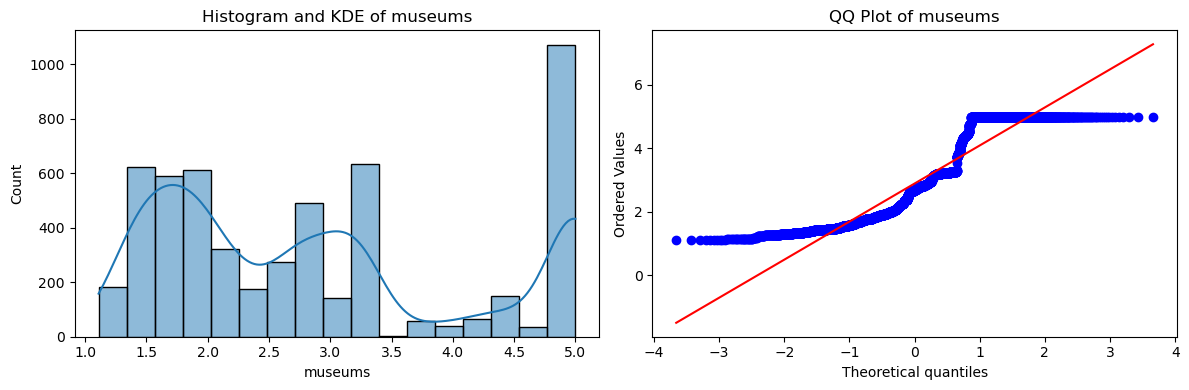

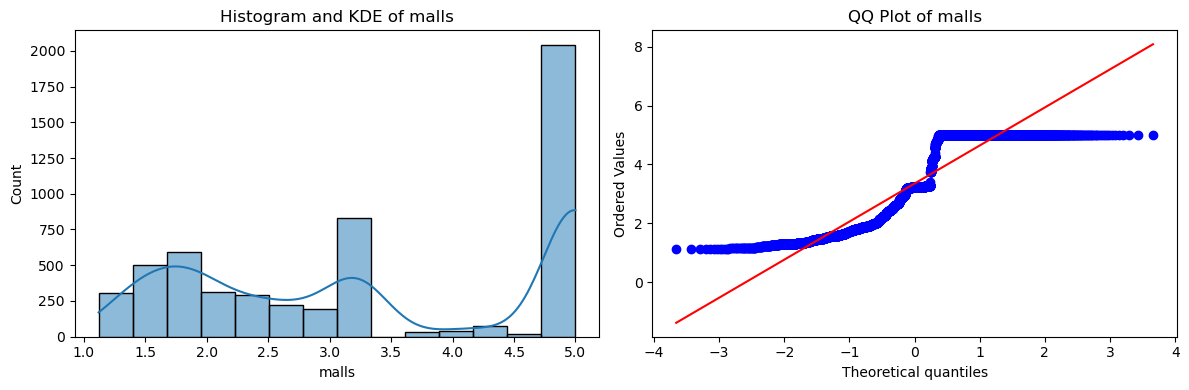

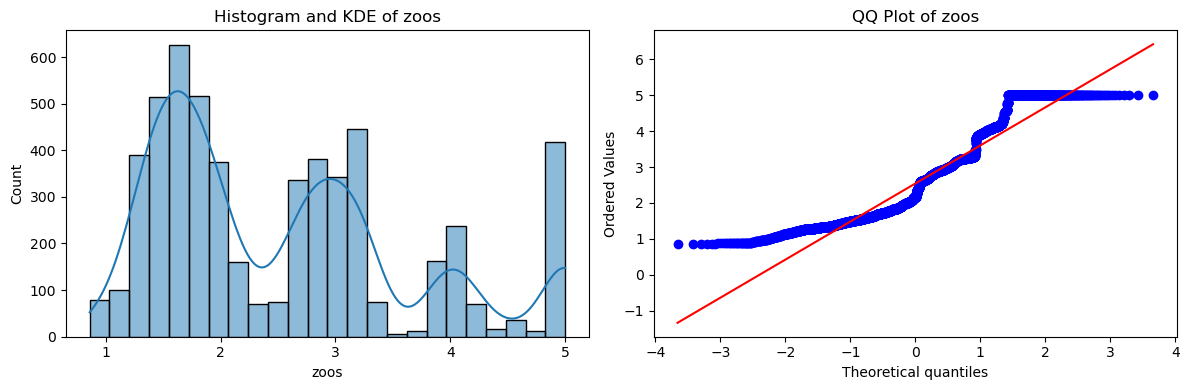

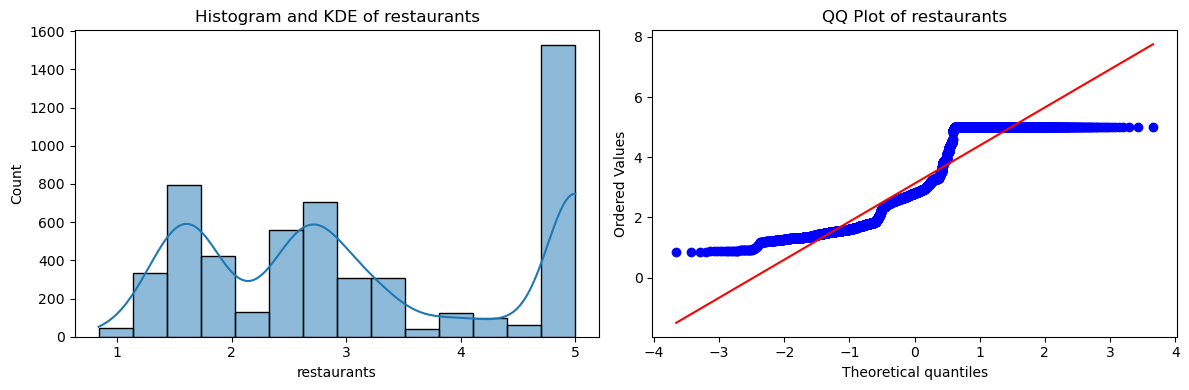

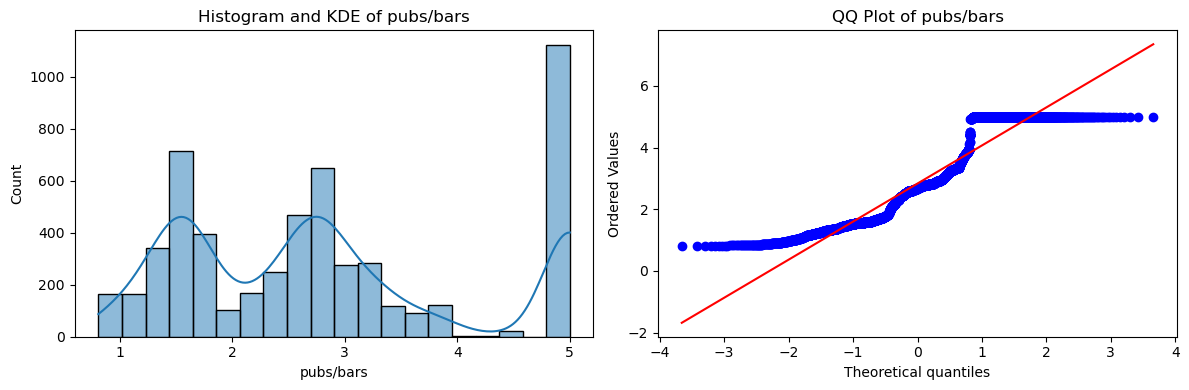

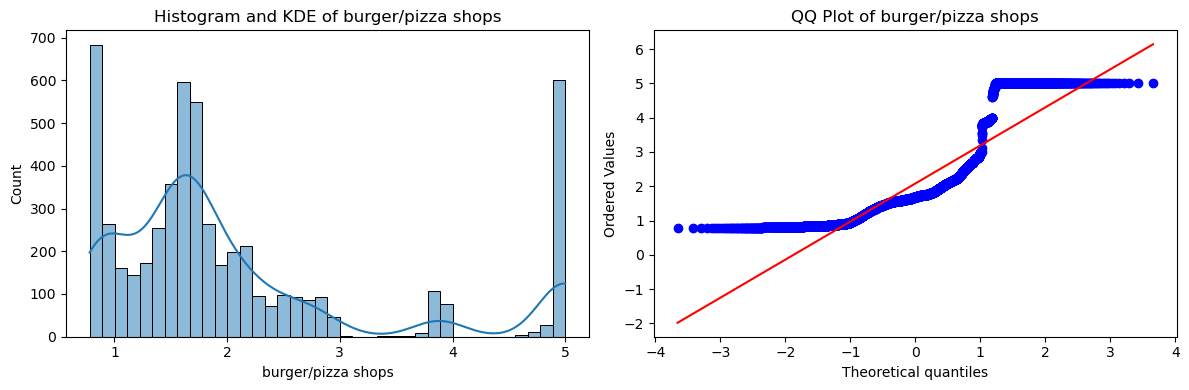

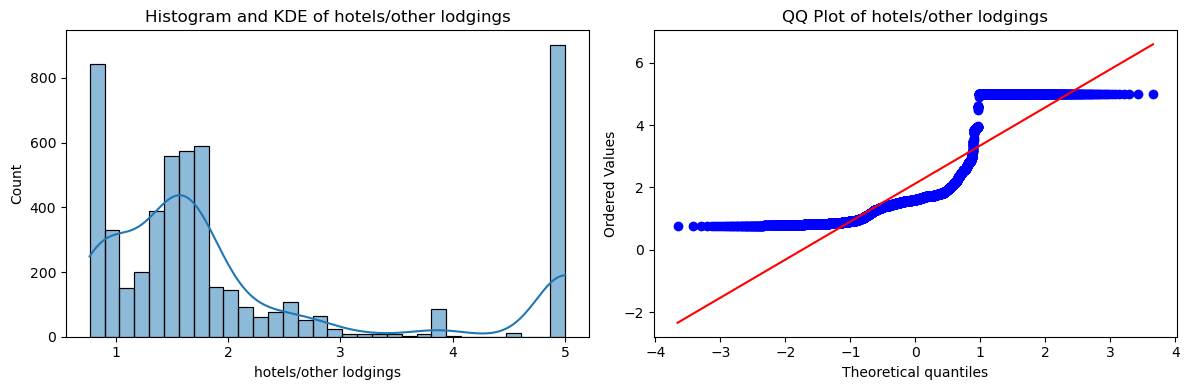

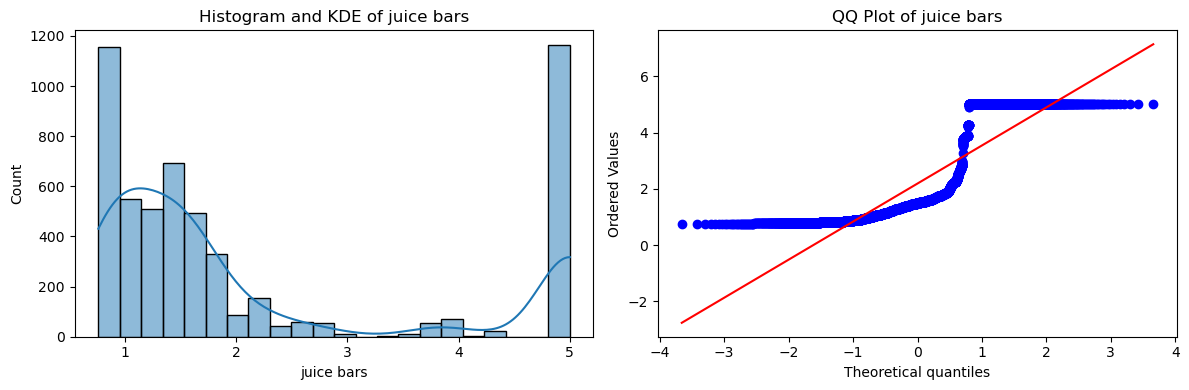

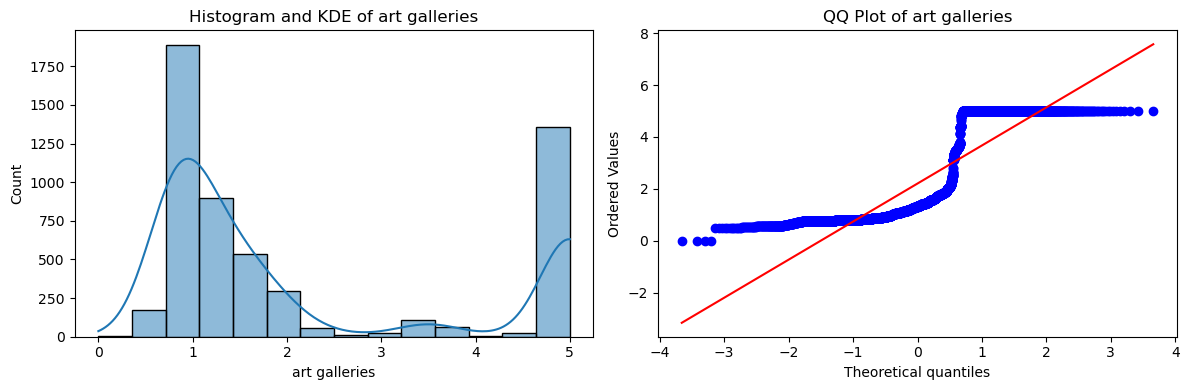

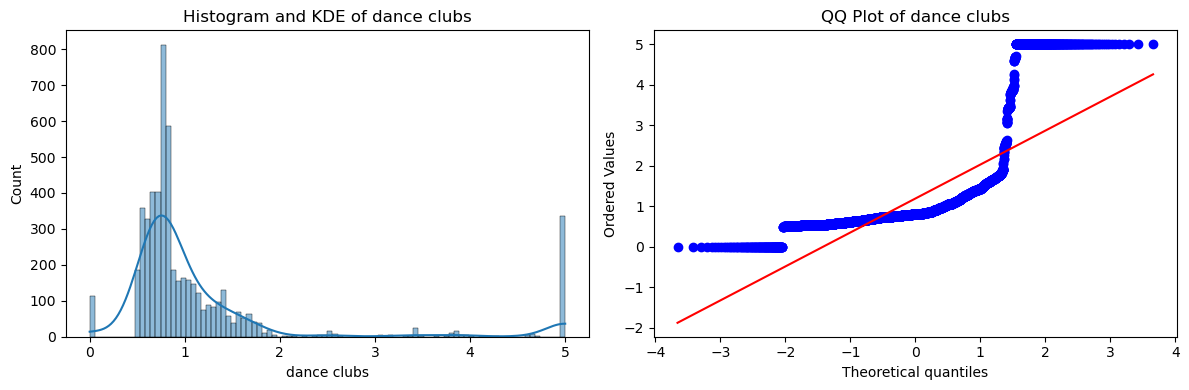

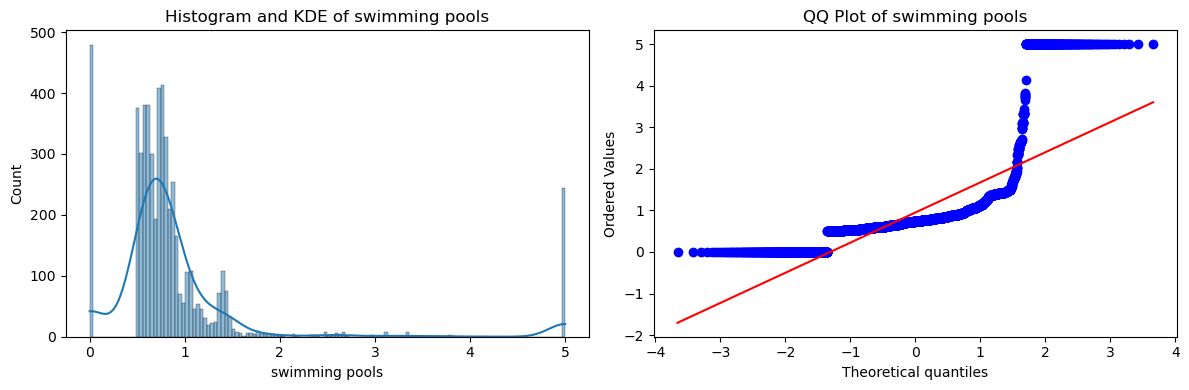

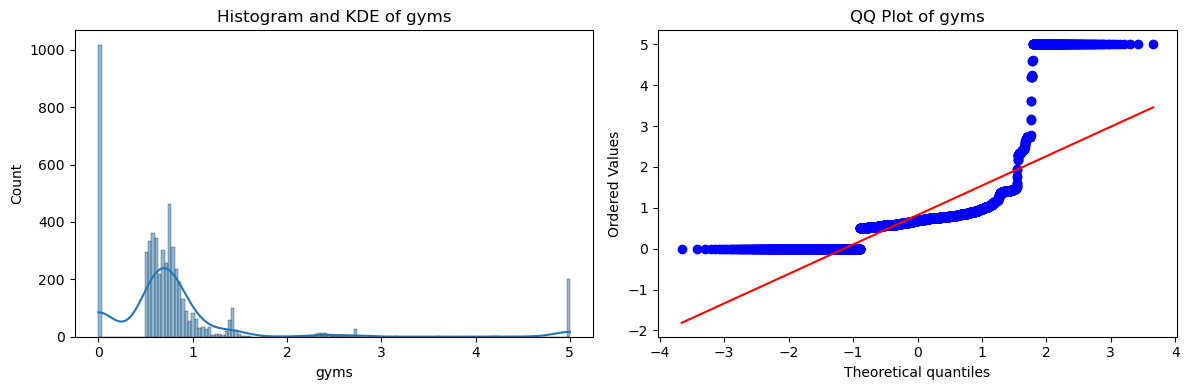

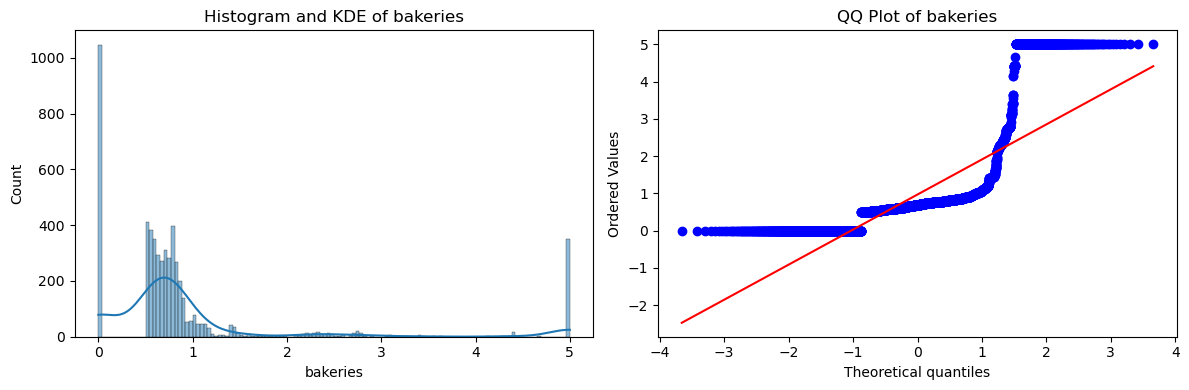

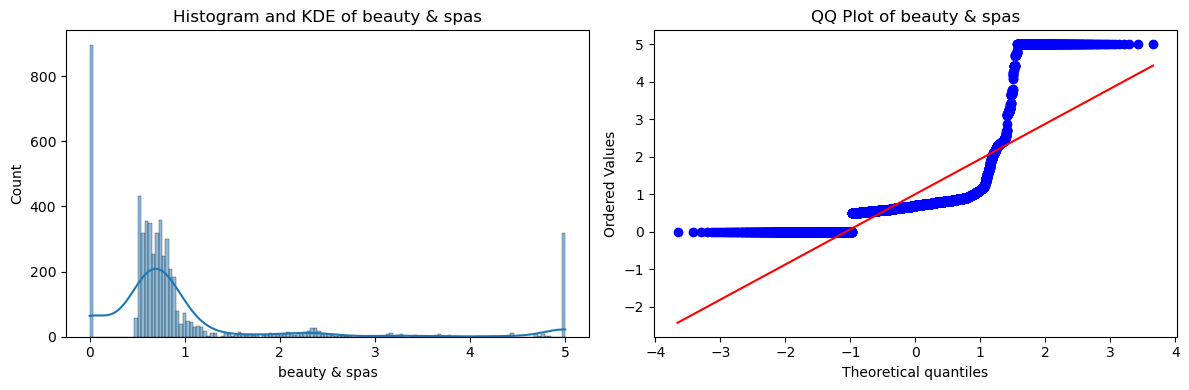

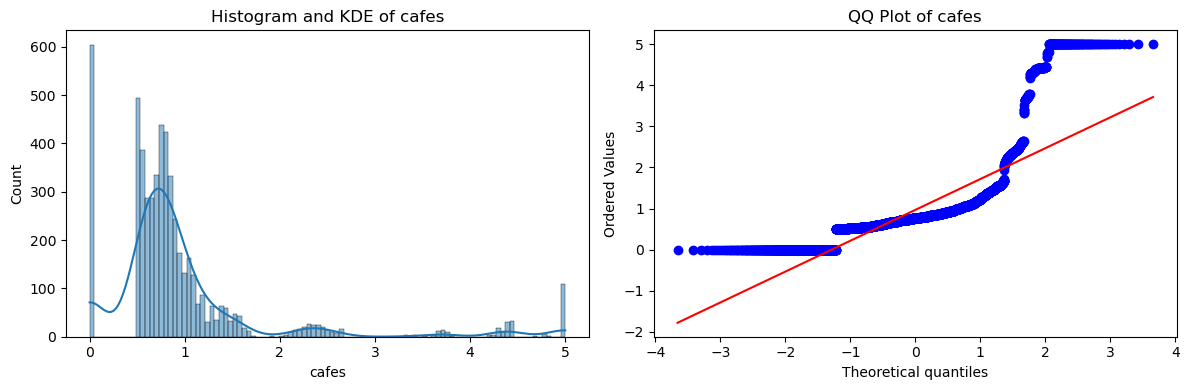

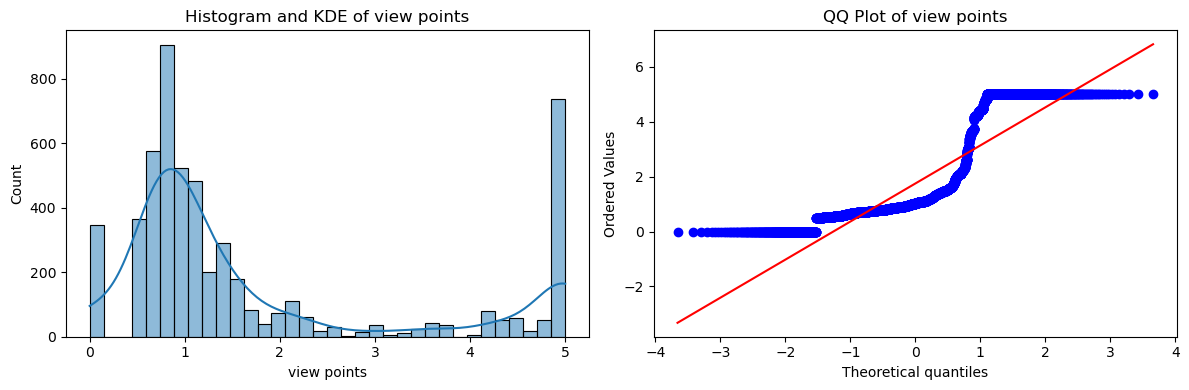

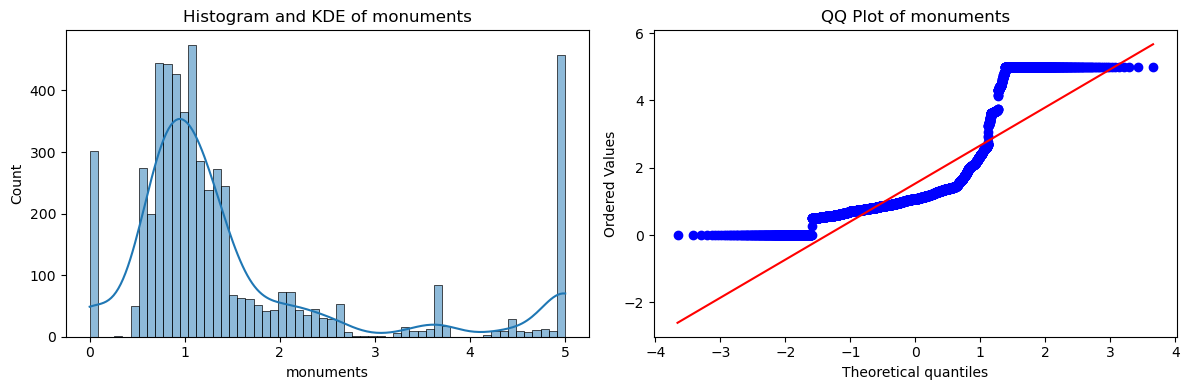

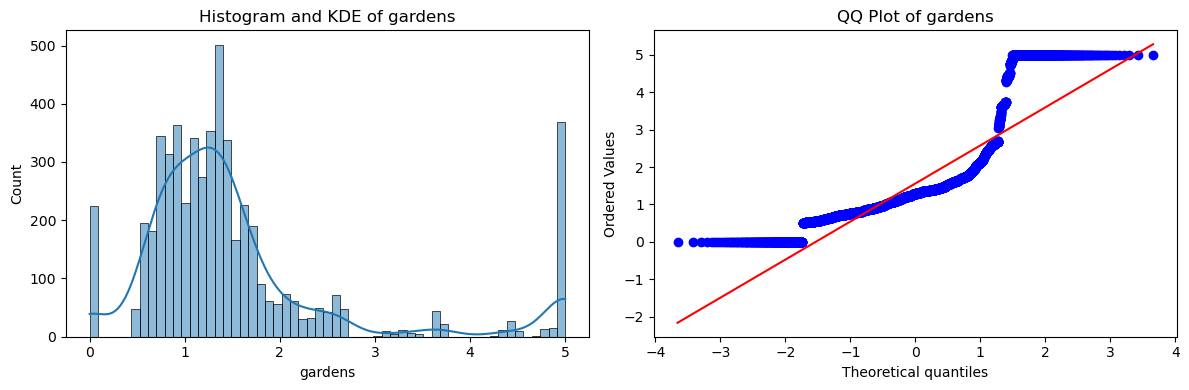

In [9]:
## Print the distribution of the Data

for col in df_user_travel_reviews.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_user_travel_reviews[col], kde=True)
    plt.title(f'Histogram and KDE of {col}')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df_user_travel_reviews[col].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    
    plt.tight_layout()
    plt.show()

In [10]:
from scipy.stats import shapiro, anderson, kstest

for col in df_user_travel_reviews.select_dtypes(include=['float64', 'int64']).columns:
    print(f'\nColumn: {col}')
    
    data = df_user_travel_reviews[col].dropna()
    
    # Shapiro-Wilk Test (for small-medium datasets)
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk: stat={stat:.4f}, p={p:.4f}')
    
    # Anderson-Darling Test
    result = anderson(data, dist='norm')
    print('Anderson-Darling Statistic:', result.statistic)
    print('Critical Values:', result.critical_values)
    
    # Kolmogorov-Smirnov (optional)
    d_stat, d_p = kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f'Kolmogorov-Smirnov: stat={d_stat:.4f}, p={d_p:.4f}')


Column: age
Shapiro-Wilk: stat=0.9559, p=0.0000
Anderson-Darling Statistic: 58.565821425317154
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.0660, p=0.0000

Column: churches
Shapiro-Wilk: stat=0.8712, p=0.0000
Anderson-Darling Statistic: 143.5509244092209
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.1358, p=0.0000

Column: resorts
Shapiro-Wilk: stat=0.8539, p=0.0000
Anderson-Darling Statistic: 308.1858165160611
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.1530, p=0.0000

Column: beaches
Shapiro-Wilk: stat=0.8147, p=0.0000
Anderson-Darling Statistic: 386.40242045259765
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.1787, p=0.0000

Column: parks
Shapiro-Wilk: stat=0.8400, p=0.0000
Anderson-Darling Statistic: 321.6055772758864
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Kolmogorov-Smirnov: stat=0.1669, p=0.0000

Column: theatres
Shapiro-Wilk: stat=0.8550, p=0.0000

In [11]:
# === Define distributions to check ===
distributions = ['norm', 'gamma', 'expon', 'lognorm', 'beta']

# === Function to fit distributions and compute KS test ===
def analyze_distribution(series, dists):
    results = []
    data = series.dropna().values
    if len(data) < 10:
        return None  # Skip small samples
    for dist_name in dists:
        dist = getattr(stats, dist_name)
        try:
            params = dist.fit(data)
            D, p = stats.kstest(data, dist_name, args=params)
            results.append((dist_name, D, p))
        except Exception as e:
            continue  # Skip if fitting fails
    return sorted(results, key=lambda x: x[2], reverse=True)  # sort by p-value desc

# === Analyze all numeric columns ===
def analyze_dataframe_distributions(df, dists):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    summary = {}
    for col in numeric_cols:
        print(f"\nAnalyzing column: {col}")
        results = analyze_distribution(df[col], dists)
        if results:
            summary[col] = results
            for dist, D, p in results:
                print(f"  {dist:>8} | KS Stat = {D:.4f} | p = {p:.4f}")
        else:
            print("  Not enough data or fitting failed.")
    return summary

# === Run the analysis ===
distribution_summary = analyze_dataframe_distributions(df_user_travel_reviews, distributions)




Analyzing column: age
      beta | KS Stat = 0.0354 | p = 0.0000
   lognorm | KS Stat = 0.0649 | p = 0.0000
     gamma | KS Stat = 0.0656 | p = 0.0000
      norm | KS Stat = 0.0660 | p = 0.0000
     expon | KS Stat = 0.1611 | p = 0.0000

Analyzing column: churches
      beta | KS Stat = 0.0829 | p = 0.0000
     gamma | KS Stat = 0.0838 | p = 0.0000
      norm | KS Stat = 0.1358 | p = 0.0000
     expon | KS Stat = 0.2815 | p = 0.0000
   lognorm | KS Stat = 0.5378 | p = 0.0000

Analyzing column: resorts
     gamma | KS Stat = 0.1158 | p = 0.0000
      norm | KS Stat = 0.1530 | p = 0.0000
     expon | KS Stat = 0.2424 | p = 0.0000
   lognorm | KS Stat = 0.5293 | p = 0.0000
      beta | KS Stat = 0.3730 | p = 0.0000

Analyzing column: beaches
   lognorm | KS Stat = 0.1102 | p = 0.0000
     gamma | KS Stat = 0.1166 | p = 0.0000
      norm | KS Stat = 0.1787 | p = 0.0000
     expon | KS Stat = 0.3690 | p = 0.0000
      beta | KS Stat = 0.3150 | p = 0.0000

Analyzing column: parks
   lognorm